In [1]:
%matplotlib inline
from pylab import *

Reproduce this figure:

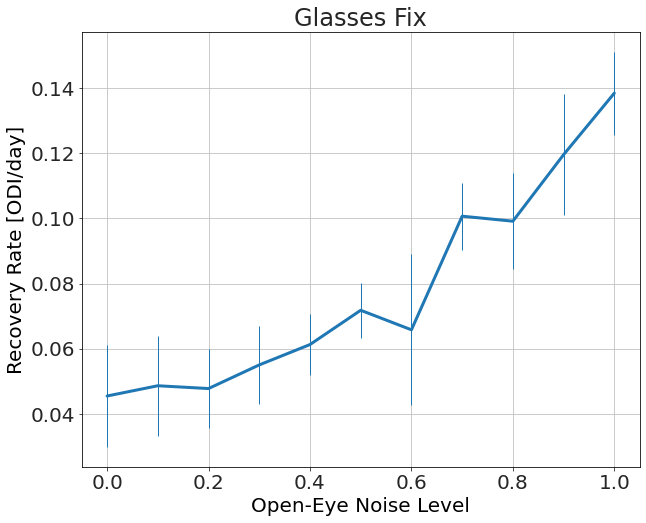

In [2]:
from deficit_defs import *

Splikes version  0.1.2
Plasticnet version  0.1.9
macOS-10.16-x86_64-i386-64bit
Base Image File: asdf/bbsk081604_all_log2dog.asdf


In [3]:
_debug = False
if _debug:
    print("Debugging")

In [4]:
base='sims/2023-01-13'
if not os.path.exists(base):
    print(f"mkdir {base}")
    os.mkdir(base)

mkdir sims/2023-01-13


In [5]:
def to_named_tuple(params_list):
    from collections import namedtuple
    keys=list(params_list[0].keys())
    keys+=['count']
    params=namedtuple('params',keys)
    
    tuples_list=[]
    for count,p in enumerate(params_list):
        p2=params(count=count,
                  **p)
        tuples_list.append(p2)
        
        
    return tuples_list

In [6]:
def make_do_params(all_params,verbose=False):
    do_params=[]
    for p in all_params:
        if os.path.exists(p.sfname):
            print("Skipping %s...already exists" % p.sfname)
        else:
            do_params+=[p]

    if verbose:
        print("%d sims" % len(do_params))    
        if len(do_params)<=15:
            print(do_params)
        else:
            print(do_params[:5],"...",do_params[-5:])        
    return do_params

In [7]:
number_of_neurons=25
eta=1e-6
number_of_processes=4

In [8]:
def run_one_continuous_fix_jitter(params,
                                  deficit_base_sim='sims/2023-01-12/deficit 25 neurons noise 0.2 blur 10.0 mu_c 7.0.asdf',
                                  overwrite=False):
    import plasticnet as pn
    count,eta,noise,mu_c,sigma_c,number_of_neurons,sfname=(params.count,params.eta,params.noise,
                        params.mu_c,params.sigma_c,params.number_of_neurons,params.sfname)
    
    if not overwrite and os.path.exists(sfname):
        return sfname

    seq=pn.Sequence()

    # DEBUG
    if _debug:
        t=1*minute
        ts=1*second

    
    seq+=fix_jitter(total_time=100*hour,
             save_interval=20*minute,number_of_neurons=params.number_of_neurons,
            mu_c=mu_c,sigma_c=sigma_c,
             eta=eta,noise=noise)
    seq_load(seq,deficit_base_sim)    

    seq.run(display_hash=False)
    pn.save(sfname,seq) 
    
    return sfname
    

In [9]:
def run_one_continuous_mask_jitter(params,
                                  deficit_base_sim='sims/2023-01-12/deficit 25 neurons noise 0.2 blur 10.0 mu_c 7.0.asdf',
                                   overwrite=False):
    import plasticnet as pn
    count,eta,contrast,mask,f,mu_c,sigma_c,number_of_neurons,sfname=(params.count,params.eta,params.contrast,params.mask,params.f,
                                        params.mu_c,params.sigma_c,params.number_of_neurons,params.sfname)
    
    if not overwrite and os.path.exists(sfname):
        return sfname

    
    seq=pn.Sequence()

    seq+=treatment_jitter(f=f,
                   mask=mask,
                   contrast=contrast,
                   total_time=100*hour,
                   eta=eta,
                    mu_c=mu_c,sigma_c=sigma_c,
                   save_interval=20*minute)
    seq_load(seq,deficit_base_sim)    

    seq.run(display_hash=False)
    pn.save(sfname,seq) 

    
    return sfname
    
    


In [10]:
def run_one_continuous_blur_jitter(params,
                                  deficit_base_sim='sims/2023-01-12/deficit 25 neurons noise 0.2 blur 10.0 mu_c 7.0.asdf',
                                   overwrite=False):
    import plasticnet as pn
    count,blur,eta,noise,mu_c,sigma_c,number_of_neurons,sfname=(params.count,params.blur,params.eta,params.noise,
                                        params.mu_c,params.sigma_c,params.number_of_neurons,params.sfname)
    
    if not overwrite and os.path.exists(sfname):
        return sfname
    
    
    seq=pn.Sequence()
    seq+=treatment_jitter(blur=blur,
                   noise=0.1,
                   noise2=noise,  # treated (strong-eye) noise
                   total_time=100*hour,number_of_neurons=params.number_of_neurons,
                    mu_c=mu_c,sigma_c=sigma_c,
                   eta=eta,
                   save_interval=20*minute)
    
    seq_load(seq,deficit_base_sim)    

    seq.run(display_hash=False)
    pn.save(sfname,seq) 
    
    return sfname
    

In [11]:
def run_one_continuous_patch_jitter(params,
                                  deficit_base_sim='sims/2023-01-12/deficit 25 neurons noise 0.2 blur 10.0 mu_c 7.0.asdf',
                                  overwrite=False):
    import plasticnet as pn
    count,eta,noise,mu_c,sigma_c,number_of_neurons,sfname=(params.count,params.eta,params.noise,
                        params.mu_c,params.sigma_c,params.number_of_neurons,params.sfname)
    
    if not overwrite and os.path.exists(sfname):
        return sfname

    seq=pn.Sequence()

    # DEBUG
    if _debug:
        t=1*minute
        ts=1*second

    seq+=patch_treatment_jitter(patch_noise=noise,
               total_time=100*hour,number_of_neurons=params.number_of_neurons,
            mu_c=mu_c,sigma_c=sigma_c,
               eta=eta,
               save_interval=20*minute)

    seq_load(seq,deficit_base_sim)    

    seq.run(display_hash=False)
    pn.save(sfname,seq) 
    
    return sfname
            
    

In [12]:
func=run_one_continuous_fix_jitter

noise_mat=linspace(0,1,11)

all_params=[]
for n,noise in enumerate(noise_mat):
    sfname=base+f'/continuous fix {number_of_neurons} neurons noise {noise:.1f}.asdf'
    
    p=Struct()
    p.eta=eta
    p.number_of_neurons=number_of_neurons
    p.sfname=sfname
    
    p.noise=noise
    p.mu_c=7
    p.sigma_c=0
    
    all_params+=[p]

all_params=to_named_tuple(all_params)  
do_params=make_do_params(all_params,verbose=True)

11 sims
[params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous fix 25 neurons noise 0.0.asdf', noise=0.0, mu_c=7, sigma_c=0, count=0), params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous fix 25 neurons noise 0.1.asdf', noise=0.1, mu_c=7, sigma_c=0, count=1), params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous fix 25 neurons noise 0.2.asdf', noise=0.2, mu_c=7, sigma_c=0, count=2), params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous fix 25 neurons noise 0.3.asdf', noise=0.30000000000000004, mu_c=7, sigma_c=0, count=3), params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous fix 25 neurons noise 0.4.asdf', noise=0.4, mu_c=7, sigma_c=0, count=4), params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous fix 25 neurons noise 0.5.asdf', noise=0.5, mu_c=7, sigma_c=0, count=5), params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous fix 25 neurons noi

In [13]:
# %%time
# print(func.__name__)
# func(all_params[0],overwrite=True)

In [14]:
real_time=2*minute+ 26
print(time2str(real_time*len(do_params)/number_of_processes))

6 m, 41.50 s


In [15]:
pool = Pool(processes=number_of_processes)
result = pool.map_async(func, do_params)
print(result.get())

asdf/bbsk081604_all.asdfasdf/bbsk081604_all.asdfasdf/bbsk081604_all.asdfasdf/bbsk081604_all.asdf



Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.[[[[.] Sequence Time Elapsed...3 m, 19.41 s
.] Sequence Time Elapsed...3 m, 19.55 s
.] Sequence Time Elapsed...3 m, 19.80 s
.] Sequence Time Elapsed...3 m, 19.97 s
asdf/bbsk081604_all.asdf
Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.asdf/bbsk081604_all.asdf
Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.[asdf/bbsk081604_all.asdf
Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.[asdf/bbsk081604_all.asdf
Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.as

## Patch

In [16]:
func=func=run_one_continuous_patch_jitter

closed_eye_noise_mat=linspace(0,1,21)

all_params=[]
for n,noise in enumerate(closed_eye_noise_mat):
    sfname=base+f'/continuous patch {number_of_neurons} neurons noise {noise:.1f}.asdf'
    
    p=Struct()
    p.eta=eta
    p.number_of_neurons=number_of_neurons
    p.sfname=sfname
    
    p.noise=noise
    p.mu_c=7
    p.sigma_c=0
    
    all_params+=[p]

all_params=to_named_tuple(all_params)  
do_params=make_do_params(all_params,verbose=True)

21 sims
[params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous patch 25 neurons noise 0.0.asdf', noise=0.0, mu_c=7, sigma_c=0, count=0), params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous patch 25 neurons noise 0.1.asdf', noise=0.05, mu_c=7, sigma_c=0, count=1), params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous patch 25 neurons noise 0.1.asdf', noise=0.1, mu_c=7, sigma_c=0, count=2), params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous patch 25 neurons noise 0.2.asdf', noise=0.15000000000000002, mu_c=7, sigma_c=0, count=3), params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous patch 25 neurons noise 0.2.asdf', noise=0.2, mu_c=7, sigma_c=0, count=4)] ... [params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous patch 25 neurons noise 0.8.asdf', noise=0.8, mu_c=7, sigma_c=0, count=16), params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous

In [17]:
# %%time
# print(func.__name__)
# func(all_params[0],overwrite=True)

In [18]:
real_time=2*minute+ 17
print(time2str(real_time*len(do_params)/number_of_processes))

11 m, 59.25 s


In [19]:
pool = Pool(processes=number_of_processes)
result = pool.map_async(func, do_params)
print(result.get())

Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.[[[[.] Sequence Time Elapsed...3 m, 14.75 s
.] Sequence Time Elapsed...3 m, 14.98 s
.] Sequence Time Elapsed...3 m, 15.02 s
.] Sequence Time Elapsed...3 m, 15.30 s
Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.[[Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.[[.] Sequence Time Elapsed...3 m, 15.30 s
.] Sequence Time Elapsed...3 m, 15.44 s
.] Sequence Time Elapsed...3 m, 16.02 s
.] Sequence Time Elapsed...3 m, 16.58 s
Using cache_images/cache

## Atropine

In [20]:
func=func=run_one_continuous_blur_jitter


atropine_blur_mat=linspace(0,6,21)
closed_eye_noise_mat=linspace(0,1,11)

all_params=[]
for b,blur in enumerate(atropine_blur_mat):
    for n,noise in enumerate(closed_eye_noise_mat):
        sfname=base+f'/continuous atropine {number_of_neurons} neurons noise {noise:.1f} blur {blur:0.1f}.asdf'

        p=Struct()
        p.eta=eta
        p.number_of_neurons=number_of_neurons
        p.sfname=sfname

        p.noise=noise
        p.blur=blur
        p.mu_c=7
        p.sigma_c=0

        all_params+=[p]

all_params=to_named_tuple(all_params)  
do_params=make_do_params(all_params,verbose=True)

231 sims
[params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous atropine 25 neurons noise 0.0 blur 0.0.asdf', noise=0.0, blur=0.0, mu_c=7, sigma_c=0, count=0), params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous atropine 25 neurons noise 0.1 blur 0.0.asdf', noise=0.1, blur=0.0, mu_c=7, sigma_c=0, count=1), params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous atropine 25 neurons noise 0.2 blur 0.0.asdf', noise=0.2, blur=0.0, mu_c=7, sigma_c=0, count=2), params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous atropine 25 neurons noise 0.3 blur 0.0.asdf', noise=0.30000000000000004, blur=0.0, mu_c=7, sigma_c=0, count=3), params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous atropine 25 neurons noise 0.4 blur 0.0.asdf', noise=0.4, blur=0.0, mu_c=7, sigma_c=0, count=4)] ... [params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous atropine 25 neurons noise 0.6 blur 6.0.

In [21]:
# %%time
# print(func.__name__)
# func(all_params[0],overwrite=True)

In [22]:
real_time=1*minute+ 49
print(time2str(real_time*len(do_params)/number_of_processes))

1 h, 44 m, 54.75 s


In [23]:
pool = Pool(processes=number_of_processes)
result = pool.map_async(func, do_params)
print(result.get())

Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.[[[[.] Sequence Time Elapsed...2 m, 21.51 s
.] Sequence Time Elapsed...2 m, 21.68 s
.] Sequence Time Elapsed...2 m, 21.69 s
.] Sequence Time Elapsed...2 m, 21.74 s
Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.[[[[.] Sequence Time Elapsed...2 m, 19.95 s
.] Sequence Time Elapsed...2 m, 20.25 s
.] Sequence Time Elapsed...2 m, 20.13 s
.] Sequence Time Elapsed...2 m, 20.31 s
Using cache_images/cache

## Contrast

In [24]:
func=func=run_one_continuous_mask_jitter


contrast_mat=linspace(0,1,11)
mask_mat=array([0,1])
f_mat=array([10,30,50,70,90])


all_params=[]
for c,contrast in enumerate(contrast_mat):
    sfname=base+f'/continuous contrast {number_of_neurons} neurons contrast {contrast:.1f}.asdf'

    p=Struct()
    p.eta=eta
    p.number_of_neurons=number_of_neurons
    p.sfname=sfname

    p.contrast=contrast
    p.mask=0
    p.f=10. # not used when mask=0
    p.mu_c=7
    p.sigma_c=0

    all_params+=[p]

all_params=to_named_tuple(all_params)  
do_params=make_do_params(all_params,verbose=True)

11 sims
[params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous contrast 25 neurons contrast 0.0.asdf', contrast=0.0, mask=0, f=10.0, mu_c=7, sigma_c=0, count=0), params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous contrast 25 neurons contrast 0.1.asdf', contrast=0.1, mask=0, f=10.0, mu_c=7, sigma_c=0, count=1), params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous contrast 25 neurons contrast 0.2.asdf', contrast=0.2, mask=0, f=10.0, mu_c=7, sigma_c=0, count=2), params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous contrast 25 neurons contrast 0.3.asdf', contrast=0.30000000000000004, mask=0, f=10.0, mu_c=7, sigma_c=0, count=3), params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous contrast 25 neurons contrast 0.4.asdf', contrast=0.4, mask=0, f=10.0, mu_c=7, sigma_c=0, count=4), params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous contrast 25 neurons contrast 0

In [25]:
# %%time
# print(func.__name__)
# func(all_params[0],overwrite=True)

In [26]:
real_time=1*minute+ 51
print(time2str(real_time*len(do_params)/number_of_processes))

5 m, 5.25 s


In [27]:
pool = Pool(processes=number_of_processes)
result = pool.map_async(func, do_params)
print(result.get())

Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.[[[[.] Sequence Time Elapsed...2 m, 0.99 s
.] Sequence Time Elapsed...2 m, 1.01 s
.] Sequence Time Elapsed...2 m, 1.09 s
.] Sequence Time Elapsed...2 m, 1.20 s
Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.[[[[.] Sequence Time Elapsed...2 m, 1.05 s
.] Sequence Time Elapsed...2 m, 1.14 s
.] Sequence Time Elapsed...2 m, 1.08 s
.] Sequence Time Elapsed...2 m, 1.35 s
Using cache_images/cache_images_

## Contrast with Mask

In [28]:
func=func=run_one_continuous_mask_jitter


contrast_mat=linspace(0,1,11)
mask_mat=array([0,1])
f_mat=array([10,30,50,70,90])


all_params=[]
for c,contrast in enumerate(contrast_mat):
    for fi,f in enumerate(f_mat):
        sfname=base+f'/continuous contrast {number_of_neurons} neurons contrast {contrast:.1f} mask f {f}.asdf'

        p=Struct()
        p.eta=eta
        p.number_of_neurons=number_of_neurons
        p.sfname=sfname

        p.contrast=contrast
        p.mask=1
        p.f=f # not used when mask=0
        p.mu_c=7
        p.sigma_c=0

        all_params+=[p]

all_params=to_named_tuple(all_params)  
do_params=make_do_params(all_params,verbose=True)

55 sims
[params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous contrast 25 neurons contrast 0.0 mask f 10.asdf', contrast=0.0, mask=1, f=10, mu_c=7, sigma_c=0, count=0), params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous contrast 25 neurons contrast 0.0 mask f 30.asdf', contrast=0.0, mask=1, f=30, mu_c=7, sigma_c=0, count=1), params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous contrast 25 neurons contrast 0.0 mask f 50.asdf', contrast=0.0, mask=1, f=50, mu_c=7, sigma_c=0, count=2), params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous contrast 25 neurons contrast 0.0 mask f 70.asdf', contrast=0.0, mask=1, f=70, mu_c=7, sigma_c=0, count=3), params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous contrast 25 neurons contrast 0.0 mask f 90.asdf', contrast=0.0, mask=1, f=90, mu_c=7, sigma_c=0, count=4)] ... [params(eta=1e-06, number_of_neurons=25, sfname='sims/2023-01-13/continuous c

In [29]:
# %%time
# print(func.__name__)
# func(all_params[0],overwrite=True)

In [30]:
real_time=1*minute+ 51
print(time2str(real_time*len(do_params)/number_of_processes))

25 m, 26.25 s


In [31]:
pool = Pool(processes=number_of_processes)
result = pool.map_async(func, do_params)
print(result.get())

Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.[[[[.] Sequence Time Elapsed...2 m, 1.69 s
.] Sequence Time Elapsed...2 m, 1.89 s
.] Sequence Time Elapsed...2 m, 1.93 s
.] Sequence Time Elapsed...2 m, 1.97 s
Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.[[[[.] Sequence Time Elapsed...2 m, 3.11 s
.] Sequence Time Elapsed...2 m, 2.88 s
.] Sequence Time Elapsed...2 m, 3.07 s
.] Sequence Time Elapsed...2 m, 3.20 s
Using cache_images/cache_images_